Para iniciar nosso trabalho vamos transcrever o que foi pedido no enunciado da atividade 3:
---

Uma mola helicoidal é uma barra prismática enrolada em torno de um cilindro circular de raio constante. Um exemplo é mostrado na Fig 1. Seja $d$ o diâmetro de
uma barra de seção circular, e seja $D$ o diâmetro de uma espira onde $n$ é o número de espiras, e $\alpha$ o ângulo de inclinação da espira com a horizontal. As extremidades da barra estão localizadas no centro da espira estão submetidas a uma força $P$. Os esforços internos em cada seção da barra se reduzem a um esforço normal constante $N_x = P sin \alpha$, a um esforço cisalhante $Q_y = P sin \alpha$, a um momento de torsão $M_t = P R cos \alpha$ e a um momento fletor $M_y = P R sin \alpha$.

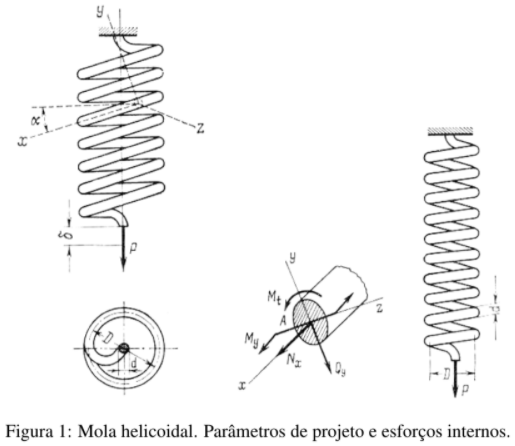



O ponto mais solicitado da seção é o ponto $A$ da superfície interior da espira.
Neste ponto, temos as seguintes tensões normais e de cisalhamento:

$$ \sigma = \frac{N_x}{A} + \frac{M_y}{W} = \frac{16PD}{\pi d^3} {\left(1 + \frac{d}{4D}\right)} sin \alpha $$

$$ \tau = \frac{Q_y}{A} + \frac{M_t}{W_p} = \frac{8PD}{\pi d^3} {\left(1 + \frac{d}{2D} \right)} cos \alpha $$

A condição de resistência é $\sqrt{\sigma 2 + 4τ^2} \leq \bar{\sigma}$, onde $\bar{\sigma}$ é a tensão limite do material. O deslocamento na extremidade livre da mola é dado por:

$$ \delta = \frac{8PD^3n}{d^4 cos \alpha} {\left[2 {\left(1 + \frac{d^2}{4D^2}\right)} \frac{sin^2 \alpha}{E} + {\left(1 + \frac{d^2}{2D^2}\right)} \frac{cos^2 \alpha}{EG}\right]}$$

onde $E$ e $G$ são os módulos de elasticidade longitudinal e transversal do material.

Considere uma linha fabril que produz molas helicoidais. Devido a problemas
de desgaste das máquinas envolvidas na produção e fatores humanos, os componentes são produzidos dentro dos seguintes limites de variação. O diâmetro externo varia *uniformemente* em torno de $D = 80 \pm 3 \space mm$. Os seguintes parâmetros tem variação com *distribuição normal* como segue: $d = 20 \pm 1 \space mm$, $\alpha = 15 \pm 2 \space graus$ e $n = 10 \space espiras$. O material fornecido apresenta as seguintes variações (com distribuição normal): $E = 200 \pm 3 \space GPa$ e $G = 80 \pm 1 \space GPa$.

Forneça um gráfico com a variação do deslocamento da mola, mostrando sua média e desvio padrão, sabendo que a carga de serviço máxima é $10.5 \space kN$. Para
uma carga de $9.2 \space kN$, qual a probabilidade de falha da mola sabendo que a tensão limite do material é $600 \space MPa$.

Resolução da 1° parte do exercício:
---

Para fornecer o gráfico com a variação do deslocamento da mola, indicando a média e o desvio padrão; será feita uma modelagem computacional, sendo o código encontrado abaixo:

In [1]:
# Importando a bibliotexa 'numpy' para resolver a equação numericamente e 'pylab' para fazer a plotagem dos gráficos

import numpy as np
import pylab as pl

---

Sabendo que o valor da carga de serviço máxima é $10.5 \space kN$, considerou-se o valor da força $P$ na sua carga máxima, sendo:

$$ P = 10.5 \space kN $$

---

In [2]:
# Declarando os valores

n = 10                                                            #Número de espiras
P_M = 10.5e3                                                      #Carga de serviço máxima

In [3]:
# Considerando que os parâmetros variam com distribuição uniforme e normal, foi feito o método vetorial para definir seus valores e suas incertezas

N=100000                                                         #Tamanho dos vetores

D  = np.random.uniform(low = 0.077, high = 0.083, size=N)        #Diâmetro de uma espira
d  = np.random.normal(loc=0.020, scale=0.001, size=N)            #Diâmetro de uma barra de seção circular
alpha = np.random.normal(loc=15, scale=2, size=N)                #Ângulo de inclinação da espira com a horizontal
E  = np.random.normal(loc=200e9, scale=3e9, size=N)              #Módulo de elasticidade do material fornecido
G  = np.random.normal(loc=80e9, scale=1e9, size=N)               #Módulo transversal do material fornecido

print('Valores de D:', D)
print('Valores de d:', d)
print('Valores de alpha:', alpha)
print('Valores de E:', E)
print('Valores de G:', G)

Valores de D: [0.08127177 0.07947055 0.07900723 ... 0.07872314 0.07798908 0.0791391 ]
Valores de d: [0.02106197 0.01925481 0.01992324 ... 0.02088112 0.01923105 0.01962798]
Valores de alpha: [15.5644058  14.5585473  16.21129052 ... 13.07134607 17.38223022
 14.74384837]
Valores de E: [1.97682609e+11 2.01167722e+11 2.00776776e+11 ... 2.04463332e+11
 2.01247485e+11 1.97179050e+11]
Valores de G: [7.90525012e+10 7.89394851e+10 8.02940515e+10 ... 8.07770874e+10
 7.96072824e+10 8.05429040e+10]


---

Uma observação a ser feita é que os valores do parâmetro são gerados de forma aletória dentro de um intervalo, ou seja, toda vez que o programa for compilado, os valores serão distintos, respeitando as variações.

---

In [4]:
# Calculando o deslocamento na extremidade livre da mola

delta = ((8*P_M*(D**3)*n)/((d**4)*np.cos(alpha*np.pi/180)))*(2 * (1+(d**2/(4*(D**2))))*(np.sin(alpha*np.pi/180)**2/E) + (1+(d**2/(2*(D**2))))*(np.cos(alpha*np.pi/180)**2/(E*G)))
print('Valores de delta:', delta)

Valores de delta: [0.0017617  0.00201994 0.00215972 ... 0.0011267  0.00274866 0.0019349 ]


In [5]:
# Calculando a média do deslocamento

media = sum(delta) / float(len(delta))
print('Média de delta:', media)

Média de delta: 0.0019792394544137924


In [6]:
# Calculando o desvio padrão do deslocamento

desvio = np.std(delta)
print('Desvio padrão de delta:', desvio)

maior = media + desvio
print('Maior grau de dispersão de delta:', maior)

menor = media - desvio
print('Menor grau de dispersão de delta:', menor)

Desvio padrão de delta: 0.000684146462985577
Maior grau de dispersão de delta: 0.0026633859173993695
Menor grau de dispersão de delta: 0.0012950929914282154


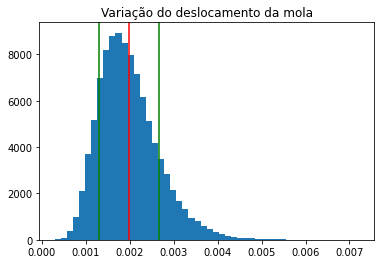

In [7]:
# Plotando o gráfico com a variação do deslocamento da mola, mostrando sua média e o desvio padrão

pl.hist(delta, bins=50)
pl.axvline(media, c='r')
pl.axvline(maior, c='g')
pl.axvline(menor, c='g')
pl.title('Variação do deslocamento da mola')
pl.show()

---

Não faz muito sentido apenas colocar o valor do desvio padrão no gráfico, por isso, foi feita a soma e a subtração com o valor da média, para saber o quão dispersos estão os valores.

---
---

Resolução da 2° parte do exercício
---

Para determinar a probabilidade de falha da mola, será feita uma modelagem computacional, sendo o código encontrado abaixo:

In [8]:
# Declarando os valores

P_m = 9.2e3                                                       #Carga de serviço do enunciado
tensao = 600e6                                                    #Tensão limite do material

In [9]:
# Calculando a tensão normal e a de cisalhamento, respectivamente

sigma = (16*P_m*D)/(np.pi*d**3)*(1+ (d/(4*D)))*np.sin(alpha*np.pi/180)
tau = (8*P_m*D)/(np.pi*d**3)*(1+ (d/(2*D)))*np.cos(alpha*np.pi/180)

print('Tensão normal', sigma)
print('Tensão de cisalhamento', tau)

Tensão normal [1.16444700e+08 1.39058933e+08 1.38924917e+08 ... 9.77028464e+07
 1.62953244e+08 1.32535905e+08]
Tensão de cisalhamento [2.21749058e+08 2.83011942e+08 2.53084218e+08 ... 2.23487649e+08
 2.75388459e+08 2.66515117e+08]


In [10]:
# Calculando a probabilidade de falha da mola

falha = ((sigma**2) + (4*(tau**2)))**0.5
print(falha)

[4.58530204e+08 5.82855406e+08 5.24887243e+08 ... 4.57528976e+08
 5.74377031e+08 5.49260408e+08]


In [11]:
# Fazendo uma estrutura de repetição para o cálculo da probabilidade de falha da mola

k = 0                                                           #Contador

for i in range(N):
    if falha[i]>tensao:                                         #Condição para falha
        k+=1

print('Probabilidade de falha:', k/N*100, '%')

Probabilidade de falha: 18.471 %


---
---
---

Referências
---

Abaixo encontram-se os links dos sites que auxiliaram na construção do código, para acessá-los, basta clicar no texto em azul.

*   [Cálculo da média](https://pt.stackoverflow.com/questions/306511/calcular-m%C3%A9dia-aritm%C3%A9tica-de-um-vetor)
*   [Cálculo do desvio padrão](https://www.geeksforgeeks.org/numpy-std-in-python/)
*   [O que é desvio padrão](https://www.todamateria.com.br/desvio-padrao/)